In [1]:
import scipy.io as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs

In [3]:
### load INTERPSTACK
file_to_open_INTERPSTACK ='../../data/01_spatial/INTERPSTACK_sep2021_v5.mat'
mat_contents = sp.loadmat(file_to_open_INTERPSTACK)

CO2 = mat_contents['INTERPSTACK'][0][0][0][0]
interp_time = mat_contents['INTERPSTACK'][0][0][1][0]
Tair = mat_contents['INTERPSTACK'][0][0][2]
runoff = mat_contents['INTERPSTACK'][0][0][3]
land = mat_contents['INTERPSTACK'][0][0][4]
lat = mat_contents['INTERPSTACK'][0][0][5][0]
lon = mat_contents['INTERPSTACK'][0][0][6][0]
topo = mat_contents['INTERPSTACK'][0][0][7]
aire = mat_contents['INTERPSTACK'][0][0][8]
gridarea = mat_contents['INTERPSTACK'][0][0][9]
suture = mat_contents['INTERPSTACK'][0][0][10]
#arc = mat_contents['INTERPSTACK'][0][0][11]#default arc from Cao
arc = mat_contents['INTERPSTACK'][0][0][12]#Cao arc-suture (as in, Cao arc subtract suture)
relict_arc = mat_contents['INTERPSTACK'][0][0][13]
#arc = mat_contents['INTERPSTACK'][0][0][14]#default plate model arcs
#arc = mat_contents['INTERPSTACK'][0][0][15]#default plate model arcs-suture
slope = mat_contents['INTERPSTACK'][0][0][16]
#we've assumed that arcs are 50 km wide, but maybe they're 100 km wide...
arc = np.minimum(1, (arc * 2))
#make sure normal arcs are gone from relict arcs
relict_arc = relict_arc*(arc == 0).astype(int)

relict_arc = np.minimum(1, (relict_arc * 2))

In [4]:
interp_time

array([-540., -500., -470., -450., -430., -400., -370., -340., -300.,
       -280., -260., -245., -220., -200., -180., -145.,  -90.,  -70.,
        -52.,  -30.,  -15.,   -0.])

/var/folders/gs/2q8t31qn5wjb02_tw8sm_c7h0000gn/T/ipykernel_53296/631506427.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/gs/2q8t31qn5wjb02_tw8sm_c7h0000gn/T/ipykernel_53296/631506427.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,9),


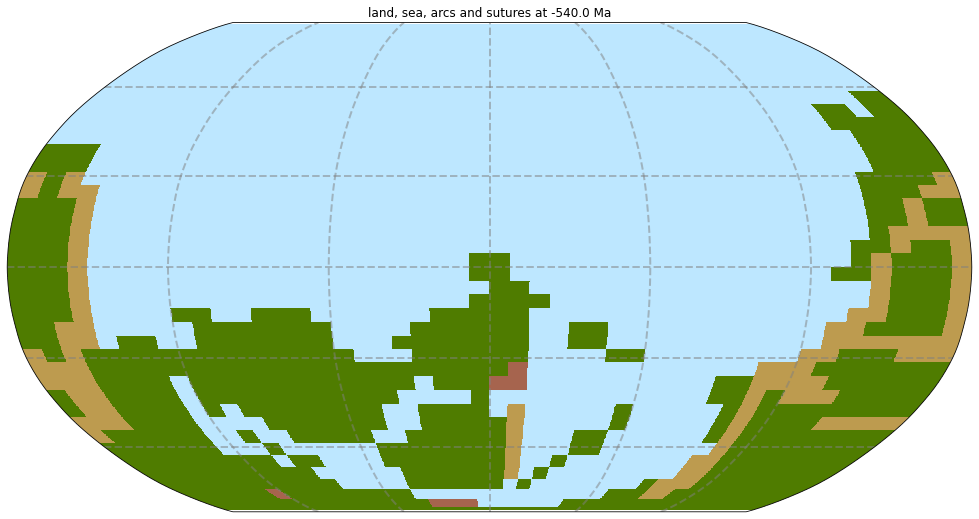

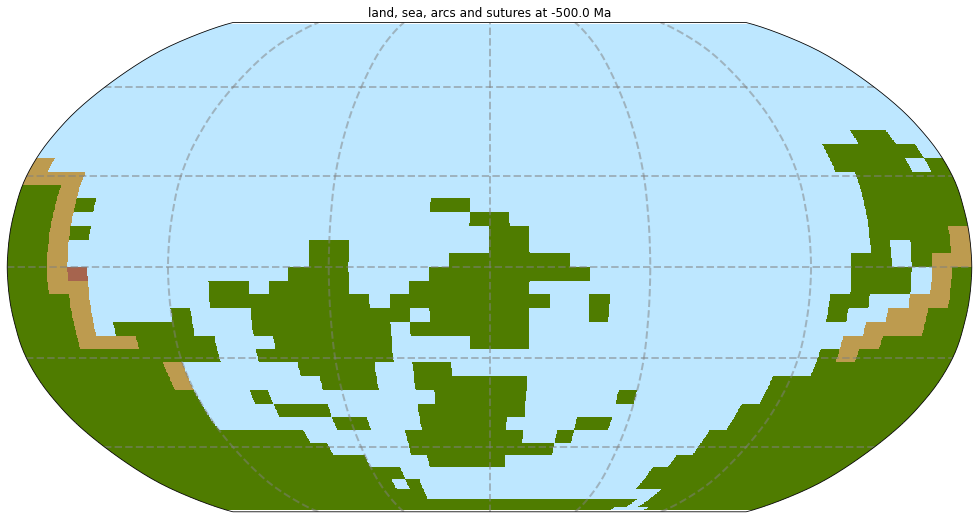

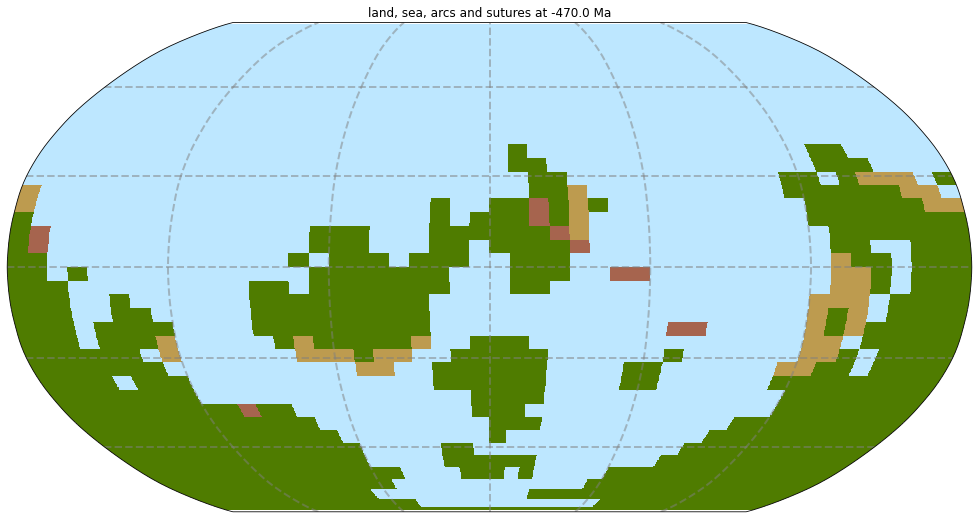

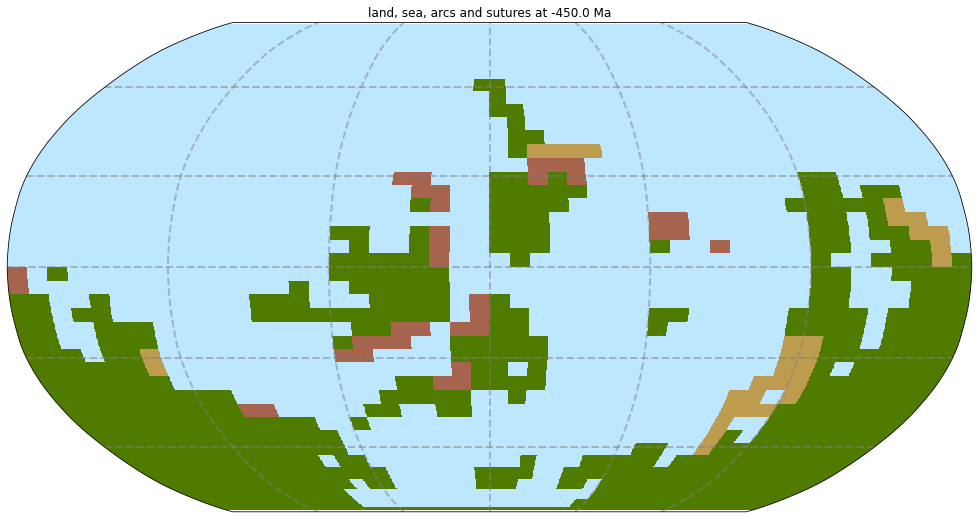

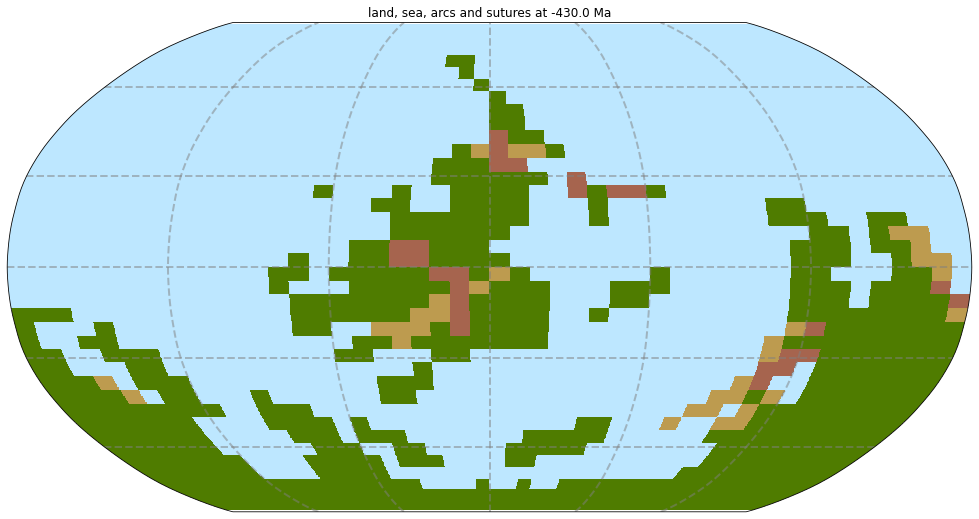

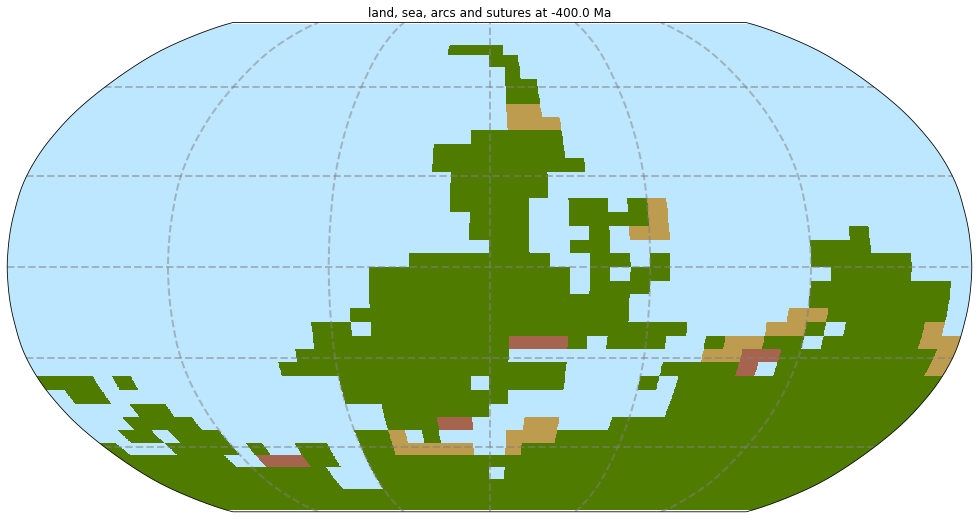

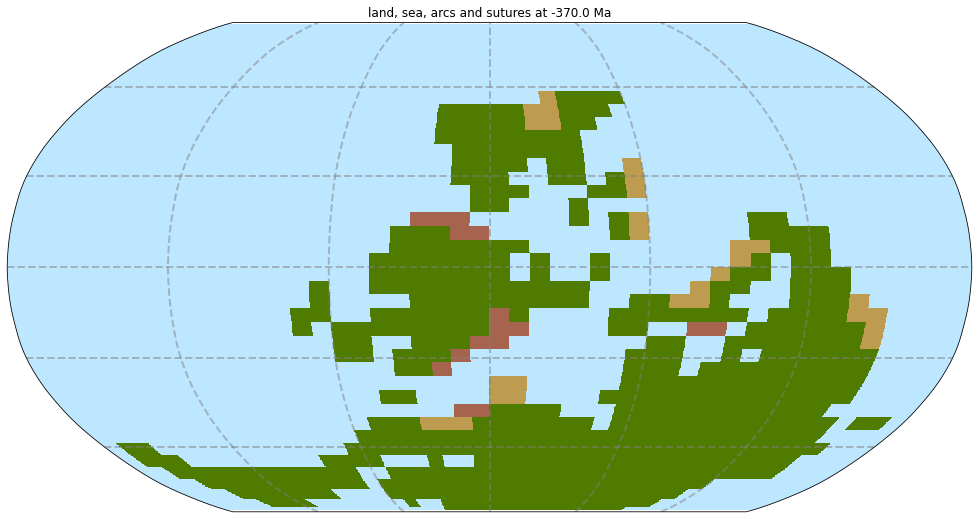

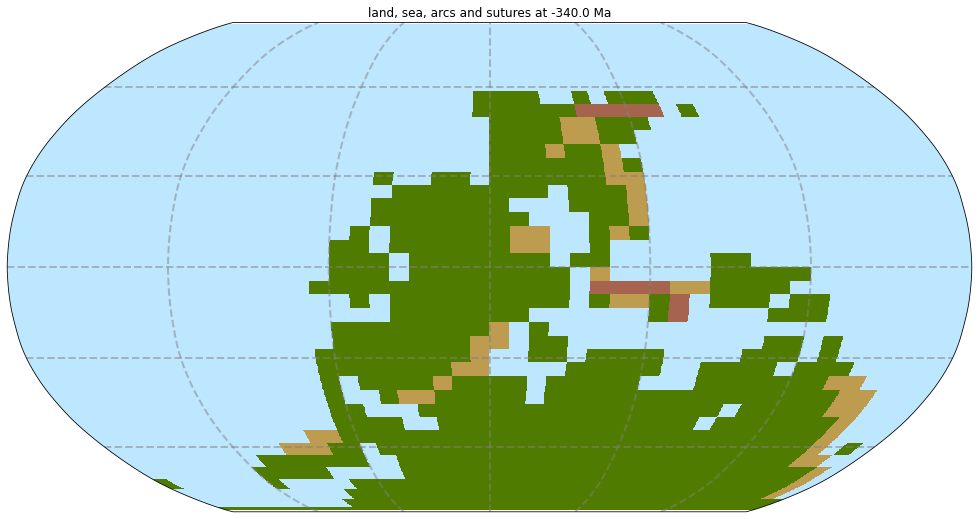

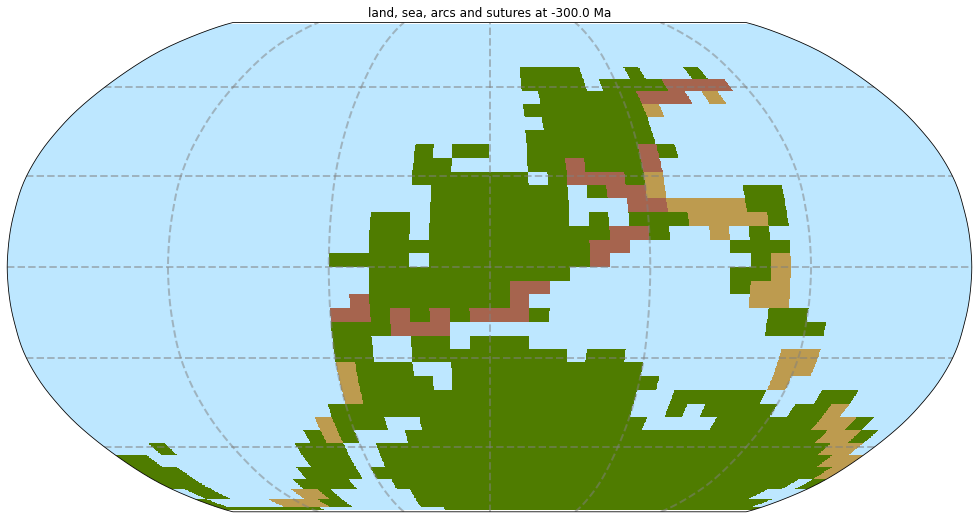

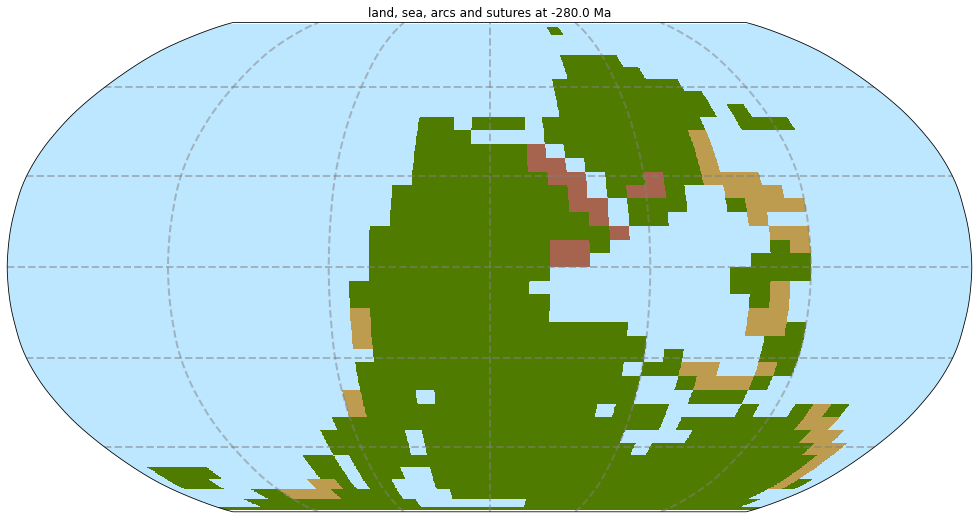

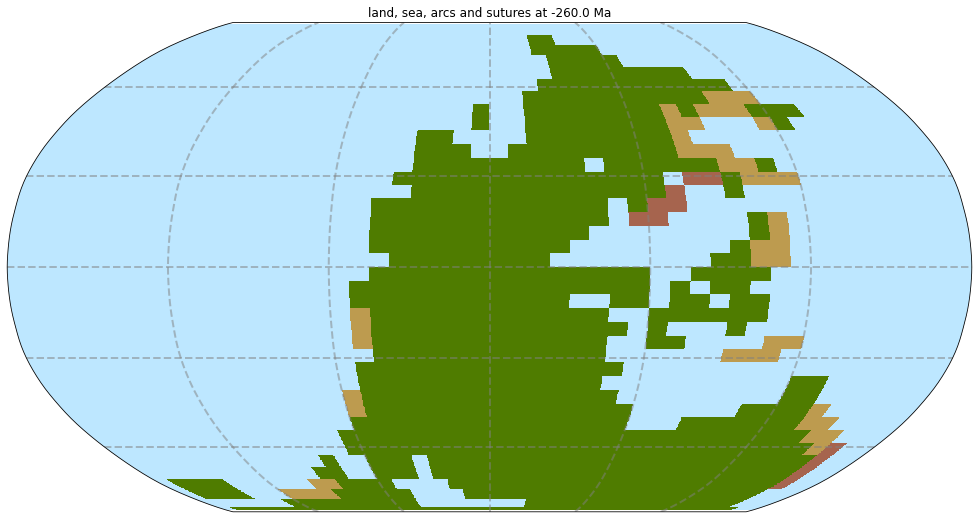

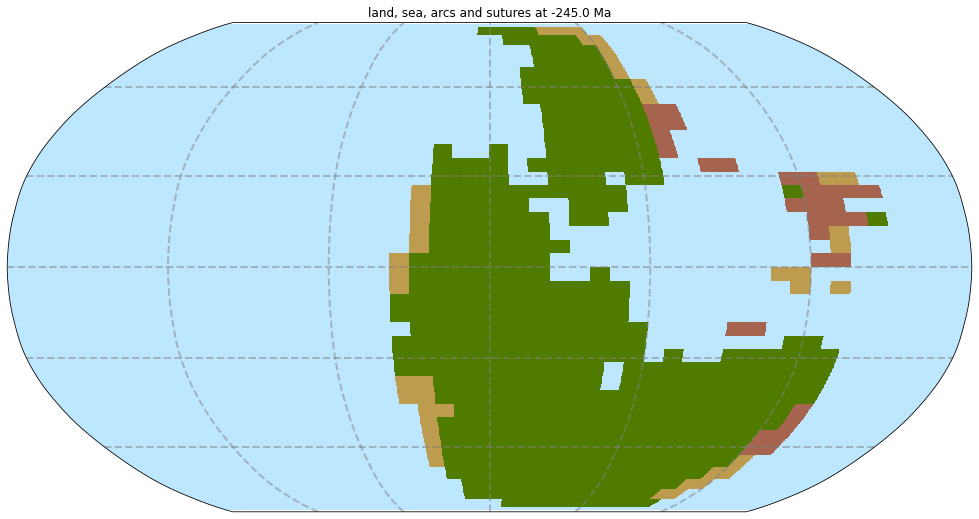

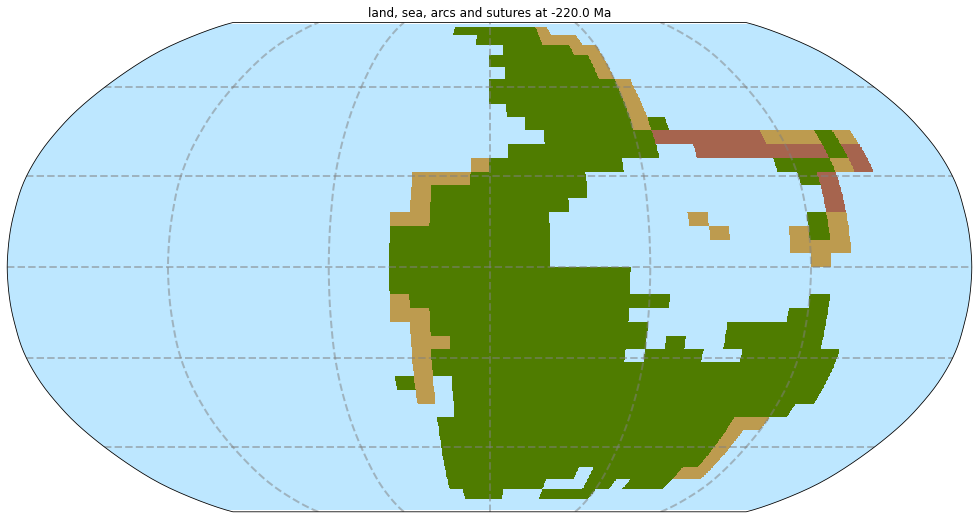

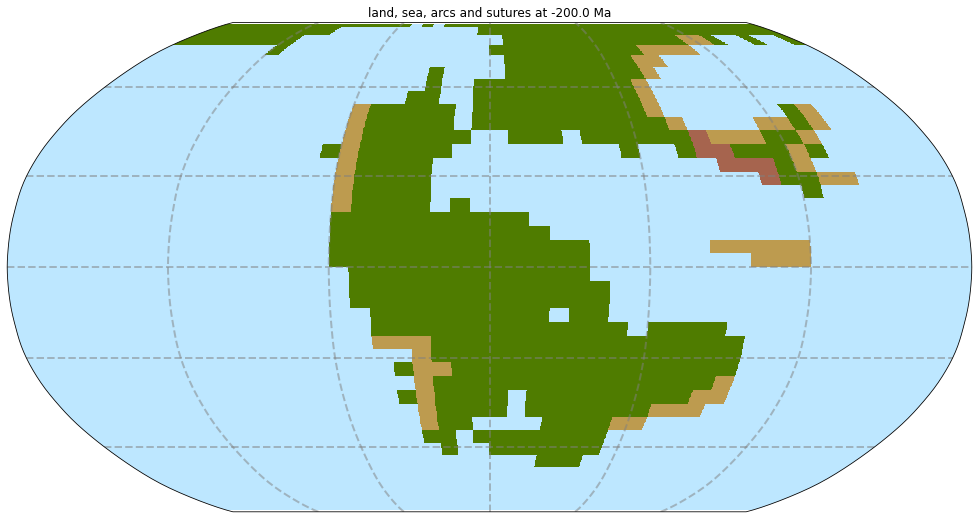

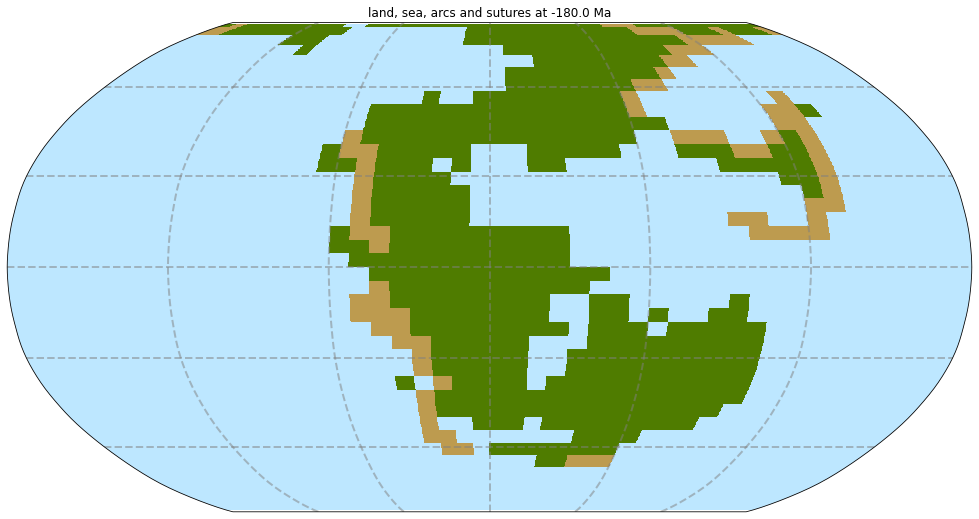

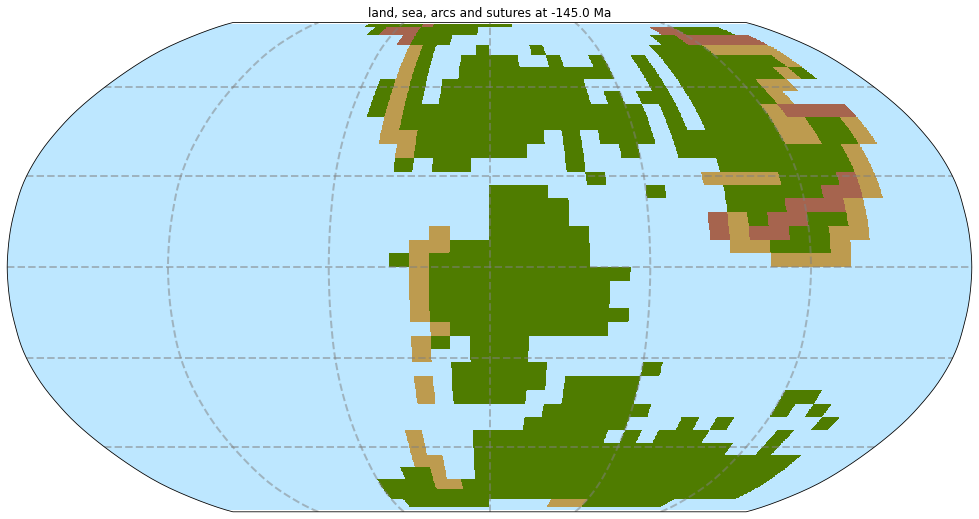

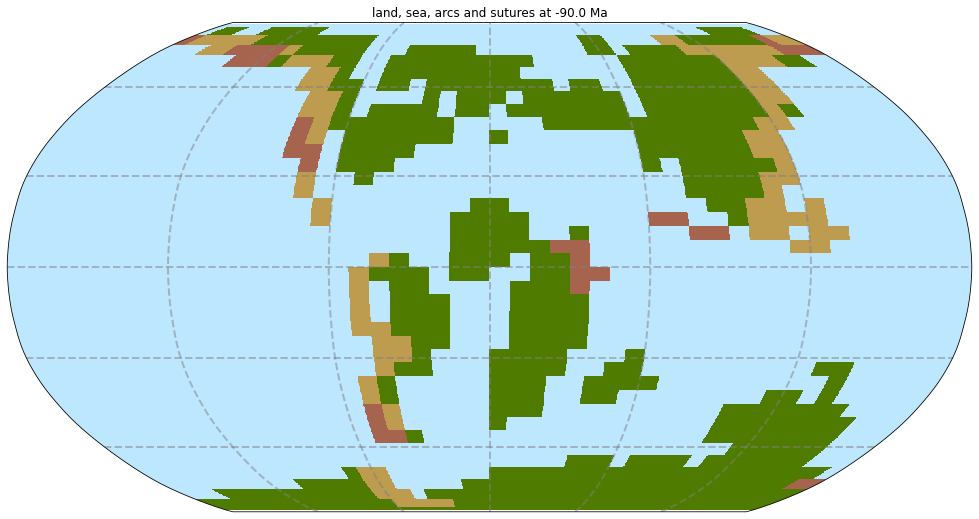

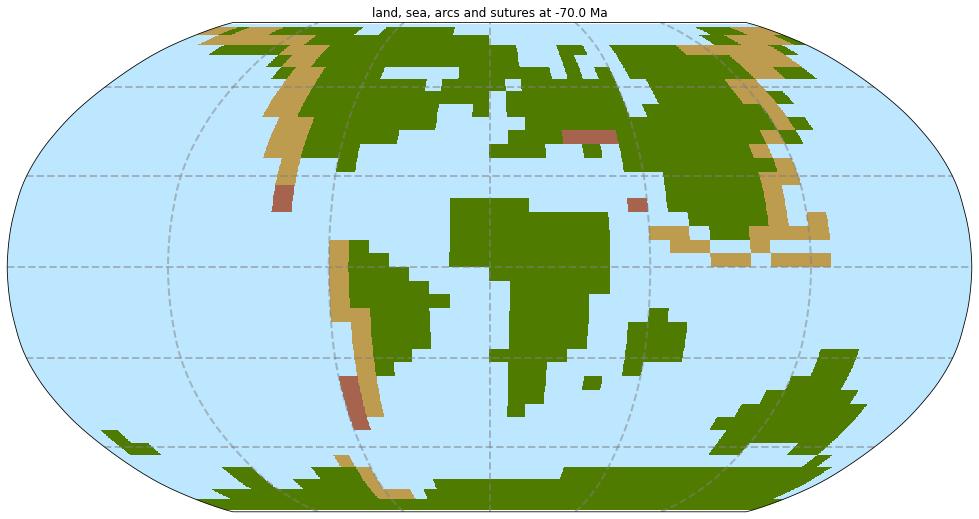

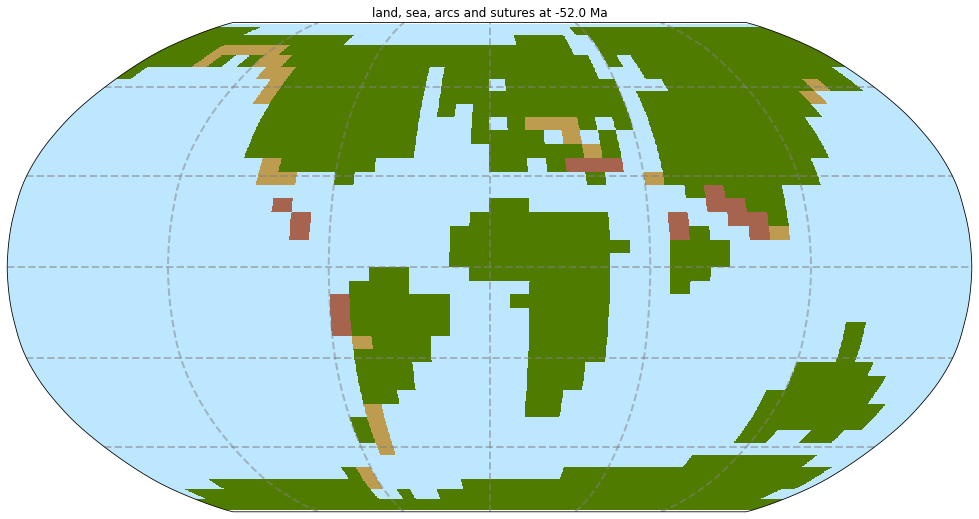

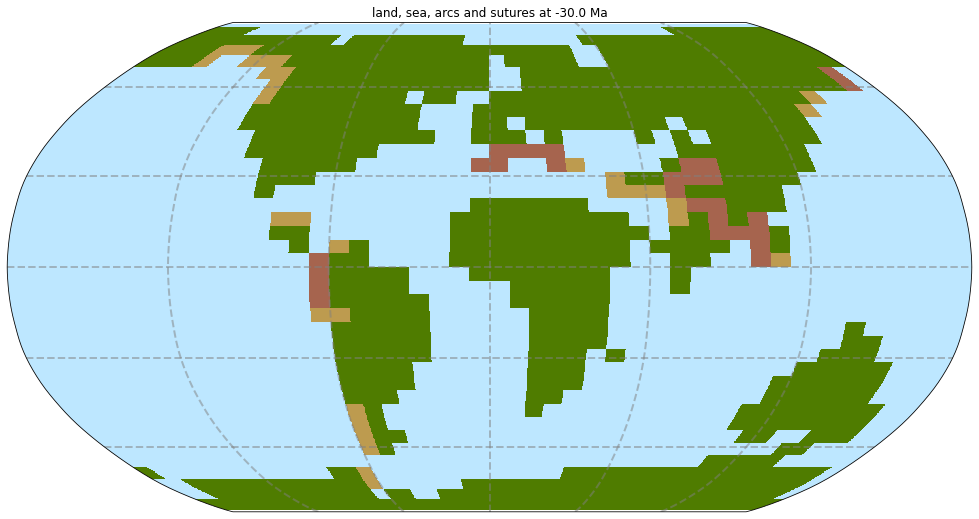

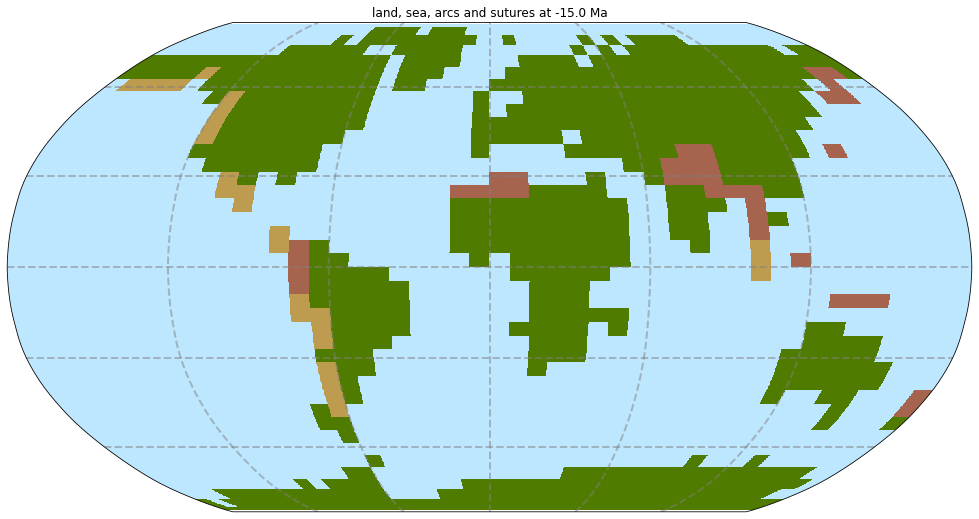

In [14]:
#### make land and sea colormap with ice
c_topo = (1/255) * np.asarray([[189, 231, 255],
                               [79, 124, 0],
                               [189, 155, 79],
                               [166, 100, 78]])
cmap_topo = mpl.colors.ListedColormap(c_topo)
norm_topo = mpl.colors.BoundaryNorm([0,1,2,3,4], cmap_topo.N)

#central_lons = [180, 0, 0, 180]
for ind, gridsub in enumerate(np.arange(0,21,1)):
    

    #create default land of timestep
    this_land = np.copy(land[:,:,gridsub])
    #get arcs and sutures
    this_suture = np.copy(suture[:,:,gridsub])
    this_arc = np.copy(arc[:,:,gridsub])
    this_land[this_arc > 0] = 2
    this_land[this_suture > 0] = 3


    data_crs = ccrs.Geodetic()
    poly_data_crs = ccrs.PlateCarree()
    central_lon = 0#central_lons[ind]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,9),
                        subplot_kw={'projection': ccrs.Robinson(central_lon)})
    ax.imshow(this_land, cmap=cmap_topo, norm=norm_topo, interpolation='none', transform=poly_data_crs)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                                 linewidth=2, color='gray', alpha=0.5, linestyle='--')

    ax.set_title('land, sea, arcs and sutures at %s Ma' % interp_time[gridsub])
    fig.show()
    #fig.savefig('./results/INTERPSTACK_FORCINGS/land_sea_arcs_%s.pdf' % (np.abs(interp_time[gridsub]))) 